In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sqlite3
db = sqlite3.connect('../data/food/world-food-facts/database.sqlite')

In [3]:
query = pd.read_sql_query('SELECT DISTINCT product_name, ' +
                          'energy_100g, proteins_100g, sugars_100g, carbohydrates_100g, fat_100g '+
                          'FROM FoodFacts '+
                          'WHERE countries_en = "United States" AND '+
                          'product_name != "" AND '+
                          'energy_100g != "" AND ' + 
                          'proteins_100g != "" AND '+
                          'sugars_100g != "" AND '+
                          'carbohydrates_100g != "" AND '+
                          'fat_100g != ""', db)

In [4]:
# [print(i) for i in query.columns]
query.head(20)

,product_name,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g
0,Pizza Parlanno,1070.00,9.77,3.76,25.60,12.00
1,Mac 'n Cheese,761.00,8.08,1.52,21.20,7.58
2,Vanilla Nonfat Yogurt,332.00,4.85,10.10,15.00,0.00
3,Pineapple Salsa,140.00,0.00,6.67,6.67,0.00
4,Tortellini,1670.00,15.40,1.54,58.50,10.80
5,Hello Panda,2230.00,6.67,33.30,66.70,26.70
6,sharon's sorbet mango,435.00,0.00,25.00,26.00,0.00
7,Spaghetti sauce with mushrooms,162.00,1.72,5.17,8.62,0.00
8,Creme Brulee,2400.00,5.00,50.00,50.00,40.00
9,Creation Hazelnut Torte Milk Chocolate,2300.00,7.50,52.50,55.00,32.50


In [5]:
query['product_name'] = query.loc[:,'product_name'].map(lambda x: x.strip())

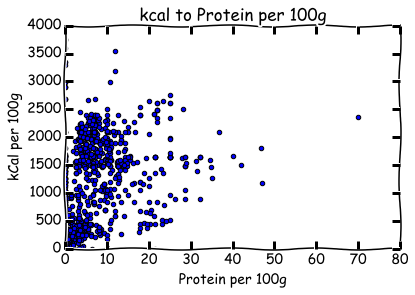

In [6]:
with plt.xkcd():
    fig1 = plt.scatter(query.proteins_100g, query.energy_100g)
    plt.xlim(0,80)
    plt.ylim(0, 4000)
    plt.xlabel('Protein per 100g')

    plt.ylabel('kCal per 100g')
    plt.title('kcal to Protein per 100g')
    plt.show()

In [7]:
query.corr()

,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g
energy_100g,1.000000,0.341708,0.278934,0.555186,0.738223
proteins_100g,0.341708,1.000000,-0.219075,0.019184,0.254547
sugars_100g,0.278934,-0.219075,1.000000,0.587472,-0.042155
carbohydrates_100g,0.555186,0.019184,0.587472,1.000000,-0.047586
fat_100g,0.738223,0.254547,-0.042155,-0.047586,1.000000


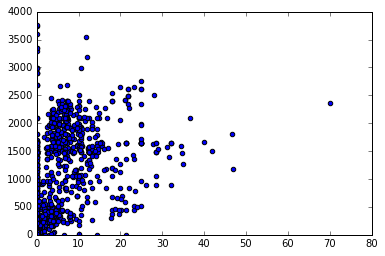

In [8]:
plt.scatter(query.proteins_100g, query.energy_100g)
plt.xlim(0,80)
plt.ylim(0, 4000)

plt.show()

In [9]:
words = ''
for prod in query.product_name:
    words += prod

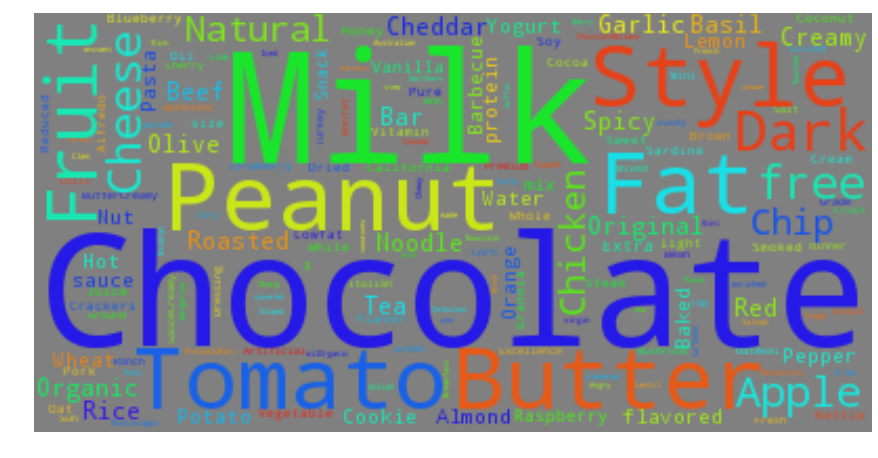

In [10]:
from wordcloud import WordCloud, STOPWORDS
with plt.xkcd():
    wordcloud = WordCloud(stopwords=STOPWORDS, 
                      background_color='grey')
    wordcloud.generate(words)

    fig1 = plt.figure(figsize=(15,15))
    fig2 = plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
### US Food ###

In [11]:
query = pd.read_sql_query('SELECT DISTINCT product_name, ' +
                          'energy_100g, proteins_100g, sugars_100g, carbohydrates_100g, fat_100g '+
                          'FROM FoodFacts '+
                          'WHERE countries_tags = "en:united-kingdom" or ' +
                                'countries_tags = "en:united-states" or '+
                                'countries_tags = "en:australia" AND '+
                          'product_name != "" AND '+
                          'energy_100g != "" AND ' + 
                          'proteins_100g != "" AND '+
                          'sugars_100g != "" AND '+
                          'carbohydrates_100g != "" AND '+
                          'fat_100g != ""', db)
## US, UK, ustralia Food##

In [12]:
query.head()

,product_name,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g
0,Flute,,,,,
1,Luxury Christmas Pudding,1284,3.9,44,54.2,7
2,Cauliflower,144,3.6,2.5,2.9,0.9
3,Spring Onions,,,,,
4,Flat Leaf Parsley,,,,,


In [13]:
# query.countries_tags.value_counts()

In [14]:
words = ''
for prod in query.product_name:
    words += prod

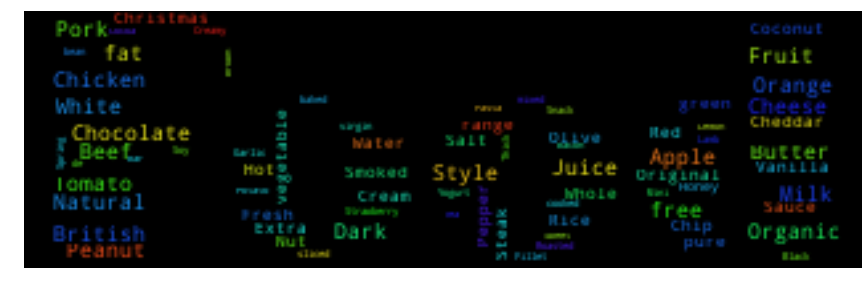

In [25]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
food_ = np.array(Image.open('../data/food/food-title.png'))
# print(food_)
# food_ = np.array(map(lambda x: 255 if x==88 else x, food_))
# for i in food:
#     if i == 


# with plt.xkcd():
wordcloud = WordCloud(stopwords=STOPWORDS, 
#                       background_color='black',
                      mask=food_)
wordcloud.generate(words)

fig1 = plt.figure(figsize=(15,15))
fig2 = plt.imshow(wordcloud)
plt.axis('off')
plt.show()